# CARBON EMISSION ANALYTICS FOR SUSTAINABLE DECISION MAKING

In [1]:
!pip install mysql-connector-python sqlalchemy


In [3]:
!pip install pymysql


In [6]:
!pip install mysql-connector-python sqlalchemy pymysql


In [7]:
from sqlalchemy import create_engine
import pandas as pd

username = "root"
password = "Kavya%40gsk1"  # encode @ as %40
host = "127.0.0.1"
port = "3306"
database = "carbonemissionsdb"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

# Test query
query = "SELECT * FROM Country LIMIT 5;"
df = pd.read_sql(query, engine)
df


,Country_id,Country_name
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,American Samoa
4,5,Angola


# TOTAL CO2 EMISSIONS BY COUNTRY

<Axes: title={'center': 'Top 10 Countries by CO₂ Emissions'}, xlabel='Country_name'>

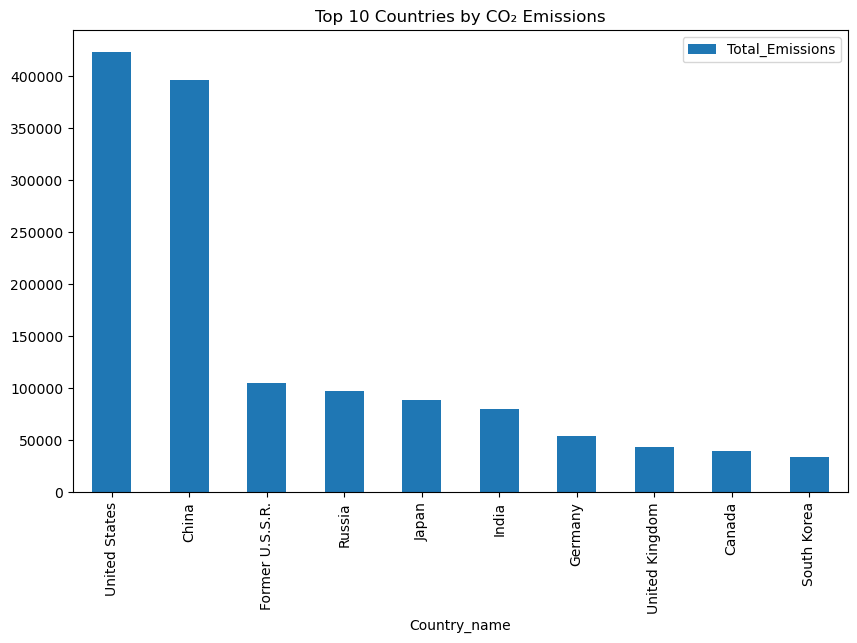

In [31]:
query = """
SELECT c.Country_name, SUM(e.CO2_emission) AS Total_Emissions
FROM Emission e
JOIN Country c ON e.Country_id = c.Country_id
GROUP BY c.Country_name
ORDER BY Total_Emissions DESC
LIMIT 10;
"""
df = pd.read_sql(query, engine)
df.plot.bar(x='Country_name', y='Total_Emissions', figsize=(10,6), title='Top 10 Countries by CO₂ Emissions')


# Trend of Global CO₂ Emissions Over Years

<Axes: title={'center': 'Global CO₂ Emissions Over Time'}, xlabel='Year'>

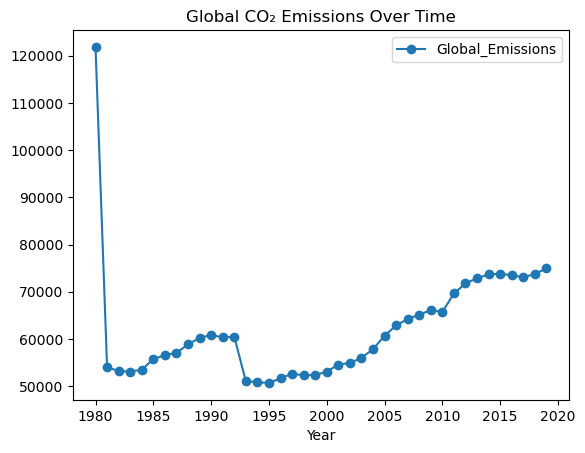

In [33]:
query = """
SELECT y.Year, SUM(e.CO2_emission) AS Global_Emissions
FROM Emission e
JOIN Year y ON e.Year_id = y.Year_id
GROUP BY y.Year
ORDER BY y.Year;
"""
df = pd.read_sql(query, engine)
df.plot.line(x='Year', y='Global_Emissions', marker='o', title='Global CO₂ Emissions Over Time')


# Energy Type Distribution in Emissions



<Axes: title={'center': 'Emission Share by Energy Type'}, ylabel='Total_Emission'>

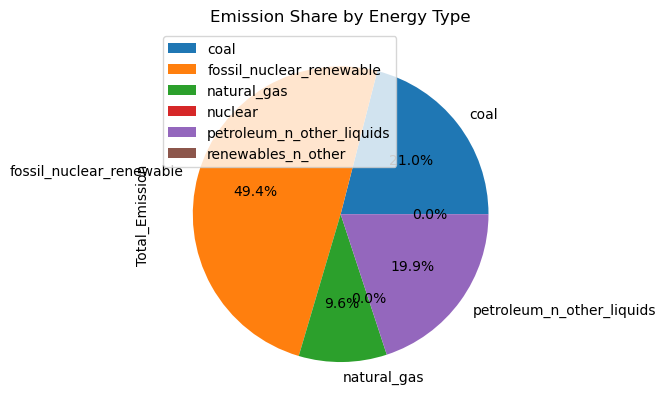

In [35]:
query = """
SELECT et.Energy_type, SUM(e.CO2_emission) AS Total_Emission
FROM Emission e
JOIN EnergyType et ON e.Energy_id = et.Energy_id
GROUP BY et.Energy_type;
"""
df = pd.read_sql(query, engine)
df.plot.pie(y='Total_Emission', labels=df['Energy_type'], autopct='%1.1f%%', title='Emission Share by Energy Type')


# Top 5 Sectors by Emissions



<Axes: title={'center': 'Top 5 Emitting Sectors'}, ylabel='Sector_name'>

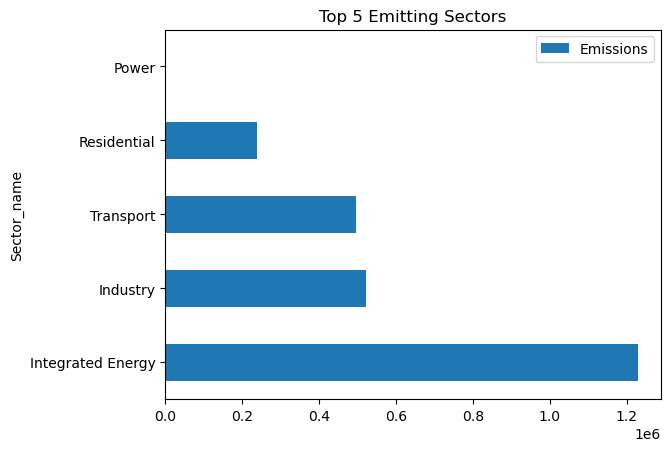

In [16]:
query = """
SELECT s.Sector_name, SUM(e.CO2_emission) AS Emissions
FROM Emission e
JOIN Sector s ON e.Sector_id = s.Sector_id
GROUP BY s.Sector_name
ORDER BY Emissions DESC
LIMIT 5;
"""
df = pd.read_sql(query, engine)
df.plot.barh(x='Sector_name', y='Emissions', title='Top 5 Emitting Sectors')


# Population vs Emissions (Recent Year)


<Axes: title={'center': 'Population vs Emissions (2019)'}, xlabel='Population', ylabel='Emissions'>

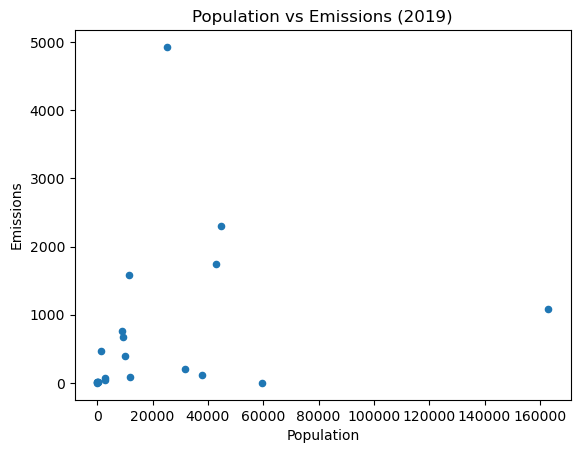

In [18]:
query = """
SELECT c.Country_name, ed.Population, SUM(e.CO2_emission) AS Emissions
FROM EconomicData ed
JOIN Emission e ON ed.Country_id = e.Country_id AND ed.Year_id = e.Year_id
JOIN Country c ON e.Country_id = c.Country_id
JOIN Year y ON e.Year_id = y.Year_id
WHERE y.Year = 2019
GROUP BY c.Country_name, ed.Population
LIMIT 20;
"""
df = pd.read_sql(query, engine)
df.plot.scatter(x='Population', y='Emissions', title='Population vs Emissions (2019)')


# Year-wise Emission Trend for Top 3 Countries


Text(0.5, 1.0, 'Year-wise Emission Trend for Top 3 Countries')

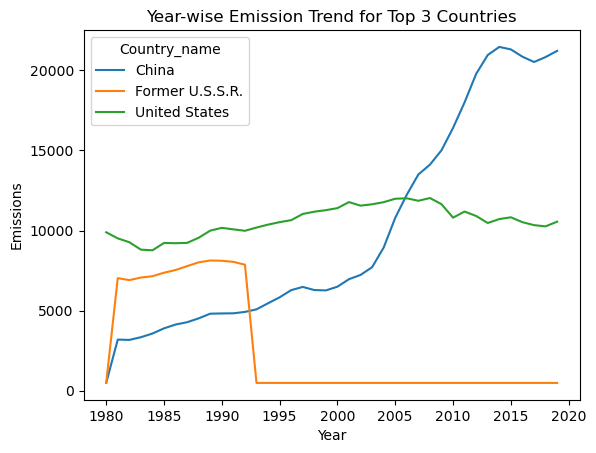

In [20]:
query = """
SELECT y.Year, c.Country_name, SUM(e.CO2_emission) AS Emissions
FROM Emission e
JOIN Country c ON e.Country_id = c.Country_id
JOIN Year y ON e.Year_id = y.Year_id
JOIN (
    SELECT c2.Country_id
    FROM Emission e2
    JOIN Country c2 ON e2.Country_id = c2.Country_id
    GROUP BY c2.Country_id
    ORDER BY SUM(e2.CO2_emission) DESC
    LIMIT 3
) top_countries ON e.Country_id = top_countries.Country_id
GROUP BY y.Year, c.Country_name
ORDER BY y.Year;
"""

df = pd.read_sql(query, engine)

import seaborn as sns
sns.lineplot(data=df, x='Year', y='Emissions', hue='Country_name').set_title('Year-wise Emission Trend for Top 3 Countries')


# GDP vs CO₂ Emissions (Bubble Chart)



<Axes: title={'center': 'GDP vs Emissions (2019)'}, xlabel='GDP', ylabel='Emissions'>

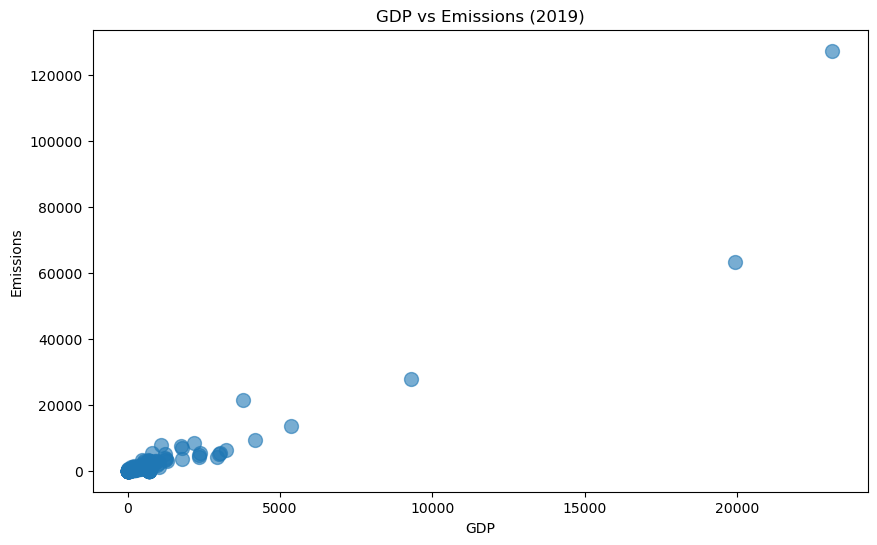

In [22]:
query = """
SELECT c.Country_name, y.Year, ed.GDP, SUM(e.CO2_emission) AS Emissions
FROM Emission e
JOIN EconomicData ed ON e.Country_id = ed.Country_id AND e.Year_id = ed.Year_id
JOIN Country c ON e.Country_id = c.Country_id
JOIN Year y ON e.Year_id = y.Year_id
WHERE y.Year = 2019
GROUP BY c.Country_name, y.Year, ed.GDP;
"""
df = pd.read_sql(query, engine)
df.plot.scatter(x='GDP', y='Emissions', s=100, alpha=0.6, figsize=(10,6), title='GDP vs Emissions (2019)')


# Energy Consumption vs Production (Top Countries)


<Axes: title={'center': 'Top 10 Countries: Energy Consumption vs Production'}, xlabel='Country_name'>

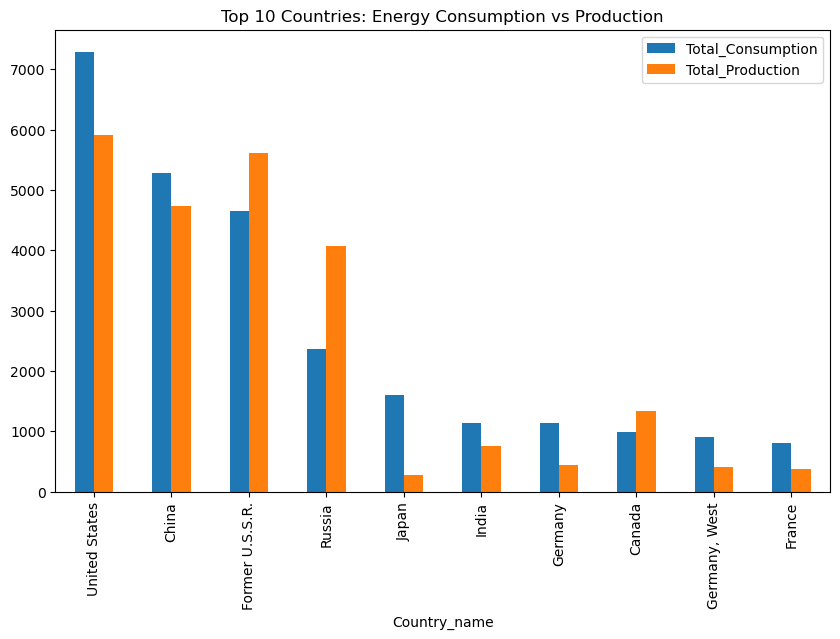

In [24]:
query = """
SELECT c.Country_name,
       SUM(ec.Consumption_value) AS Total_Consumption,
       SUM(ep.Production_value) AS Total_Production
FROM EnergyConsumption ec
JOIN EnergyProduction ep ON ec.Country_id = ep.Country_id AND ec.Year_id = ep.Year_id AND ec.Energy_id = ep.Energy_id
JOIN Country c ON ec.Country_id = c.Country_id
GROUP BY c.Country_name
ORDER BY Total_Consumption DESC
LIMIT 10;
"""
df = pd.read_sql(query, engine)
df.plot(x='Country_name', y=['Total_Consumption', 'Total_Production'], kind='bar', figsize=(10,6), title='Top 10 Countries: Energy Consumption vs Production')


# Energy Intensity (by GDP) Trend Over Time


<Axes: title={'center': 'Energy Intensity by GDP Over Time'}, xlabel='Year'>

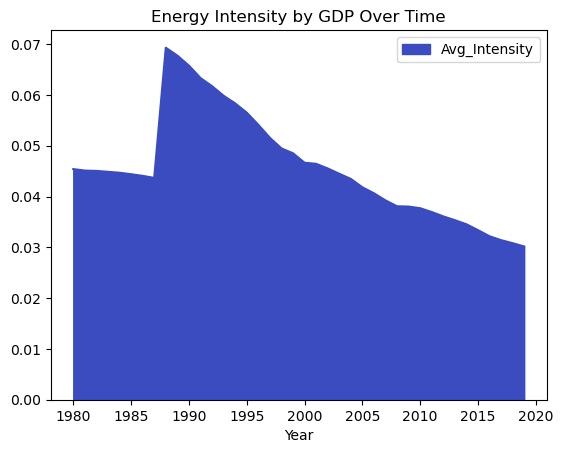

In [26]:
query = """
SELECT y.Year, AVG(ei.Energy_intensity_by_GDP) AS Avg_Intensity
FROM EnergyIntensity ei
JOIN Year y ON ei.Year_id = y.Year_id
GROUP BY y.Year
ORDER BY y.Year;
"""
df = pd.read_sql(query, engine)
df.plot(x='Year', y='Avg_Intensity', kind='area', title='Energy Intensity by GDP Over Time', colormap='coolwarm')


# Heatmap of Emissions by Country and Year


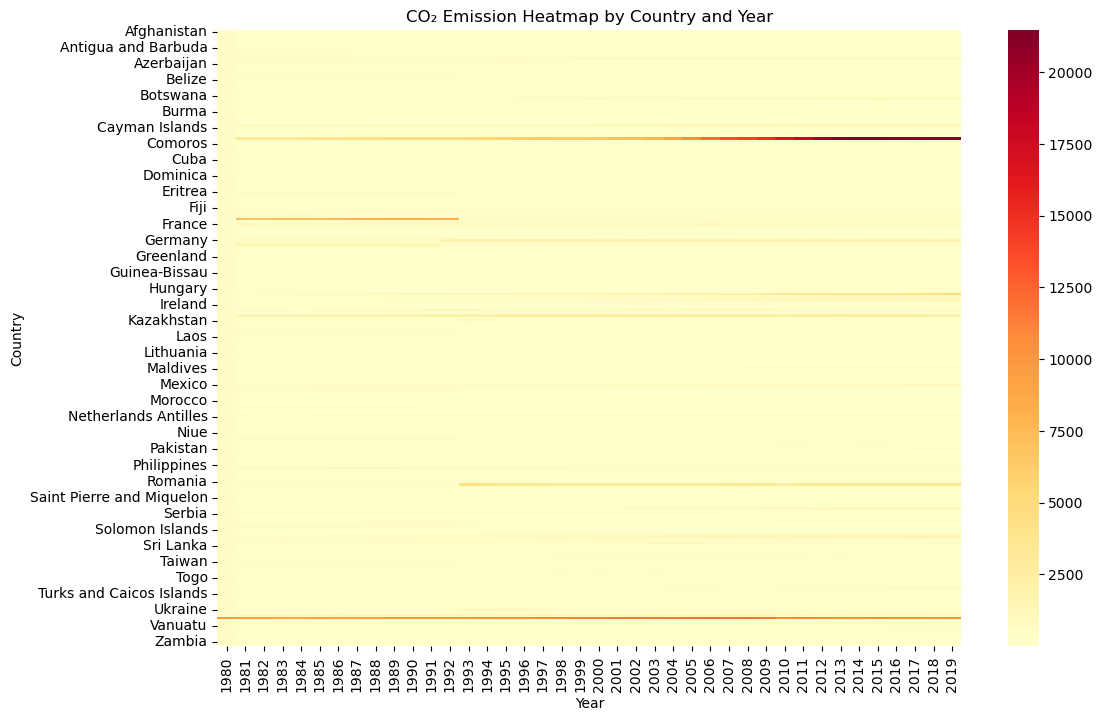

In [28]:
query = """
SELECT c.Country_name, y.Year, SUM(e.CO2_emission) AS Emissions
FROM Emission e
JOIN Country c ON e.Country_id = c.Country_id
JOIN Year y ON e.Year_id = y.Year_id
GROUP BY c.Country_name, y.Year;
"""
df = pd.read_sql(query, engine)
pivot_df = df.pivot(index='Country_name', columns='Year', values='Emissions').fillna(0)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='YlOrRd')
plt.title('CO₂ Emission Heatmap by Country and Year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()
